<a href="https://colab.research.google.com/github/Vaibhavpandey1709/Unemployment_analysis_with_Python/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**DATASET LOADING**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Unemployment in India - Unemployment in India.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**DATASET ROWS AND COLUMNS COUNT**

In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
print("Number of rows and columns are: ",df.shape)

Number of rows are:  754
Number of columns are:  7
Number of rows and columns are:  (754, 7)


**DATASET INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


**DUPLICATE VALUES**

In [ ]:
df.duplicated().sum()

13

**MISSING VALUES/ NULL VALUES**

In [ ]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

<Axes: >

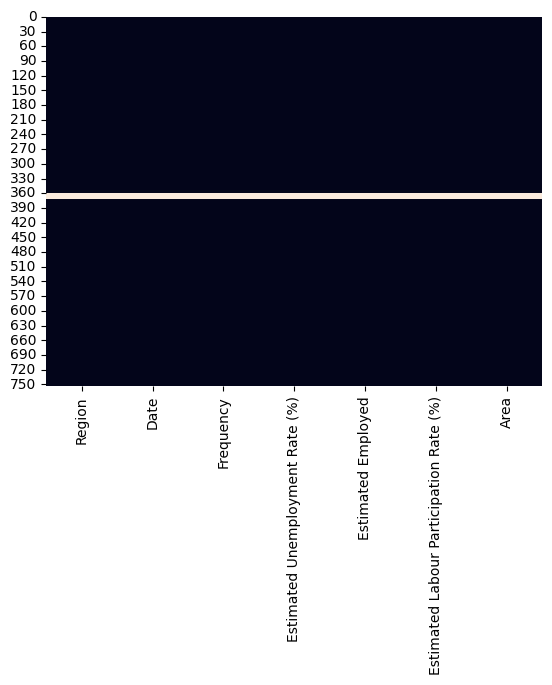

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

**UNDERSTANDING THE VARIABLES**

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


**CHECK UNIQUE VALUES FOR EACH VARIABLES**

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Region is 28
No. of unique values in Date is 14
No. of unique values in Frequency is 1
No. of unique values in Estimated Unemployment Rate (%) is 624
No. of unique values in Estimated Employed is 740
No. of unique values in Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


**DATA WRANGLING CODE**

In [ ]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']
df['Frequency'] = df['Frequency'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Region'] = df['Region'].astype('category')
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)
df.drop(columns='Month', inplace=True)
df_ld = df.copy()
df=df.dropna()
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')
df = df.loc[mask]
df.reset_index(drop=True, inplace=True)
mask = (df_ld['Date'] >= '2020-04-30')
df_ld = df_ld.loc[mask]

**DATA VISUALIZATION**

**Chart - 1 : Region Wise Estimated Unemployment Rate**

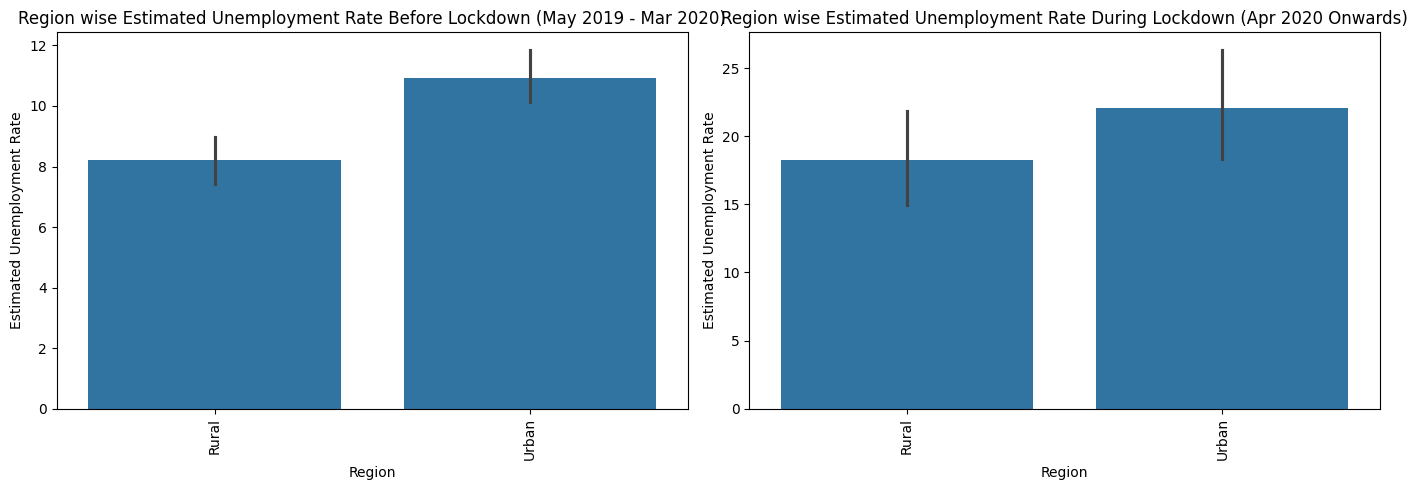

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.title('Region wise Estimated Unemployment Rate Before Lockdown (May 2019 - Mar 2020)')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)
plt.title('Region wise Estimated Unemployment Rate During Lockdown (Apr 2020 Onwards)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate**

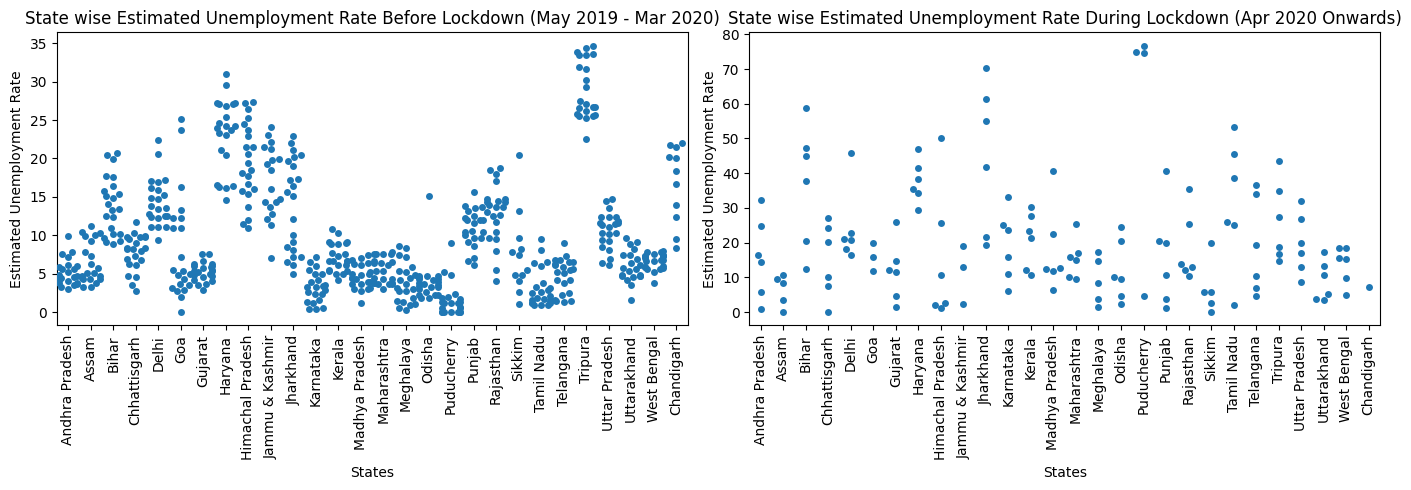

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.swarmplot(x='States', y='Estimated Unemployment Rate', data=df)
plt.title('State wise Estimated Unemployment Rate Before Lockdown (May 2019 - Mar 2020)')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.swarmplot(x='States', y='Estimated Unemployment Rate', data=df_ld)
plt.title('State wise Estimated Unemployment Rate During Lockdown (Apr 2020 Onwards)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate**

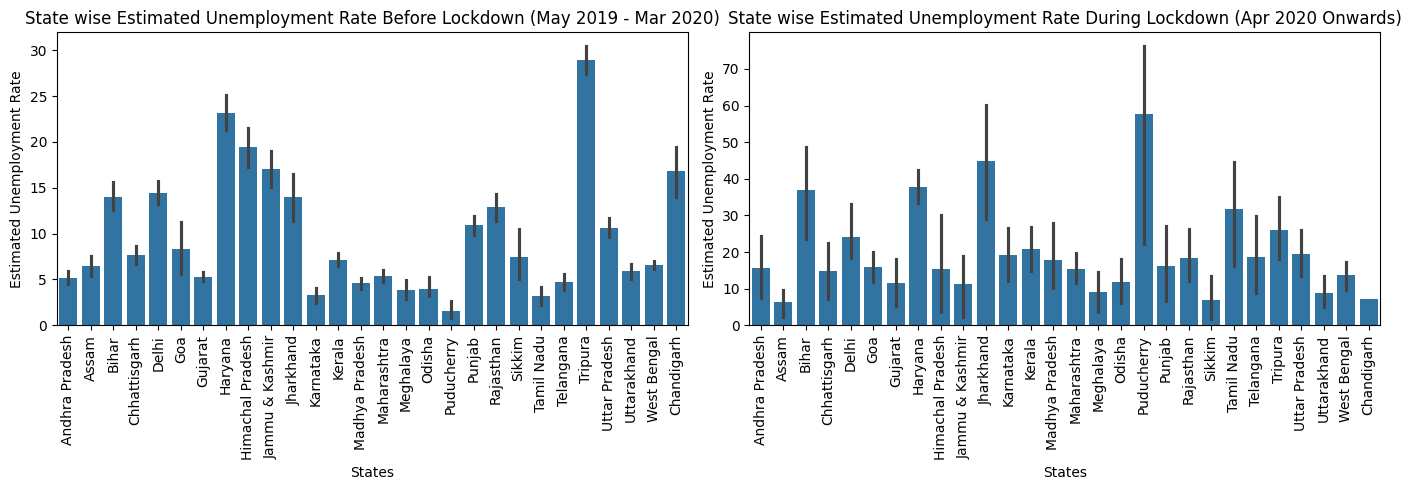

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='States', y='Estimated Unemployment Rate', data=df)
plt.title('State wise Estimated Unemployment Rate Before Lockdown (May 2019 - Mar 2020)')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='States', y='Estimated Unemployment Rate', data=df_ld)
plt.title('State wise Estimated Unemployment Rate During Lockdown (Apr 2020 Onwards)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Chart - 4 : State Wise Estimated Employed Workforce**

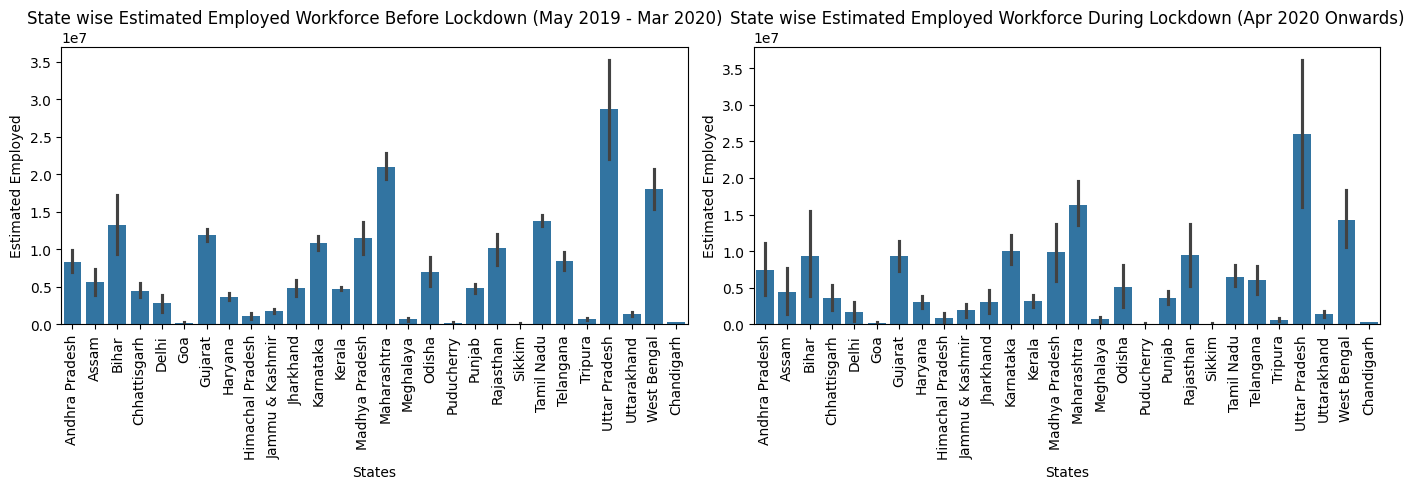

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='States', y='Estimated Employed', data=df)
plt.title('State wise Estimated Employed Workforce Before Lockdown (May 2019 - Mar 2020)')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='States', y='Estimated Employed', data=df_ld)
plt.title('State wise Estimated Employed Workforce During Lockdown (Apr 2020 Onwards)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Chart - 5 : State Wise Estimated Labour Participation Rate**

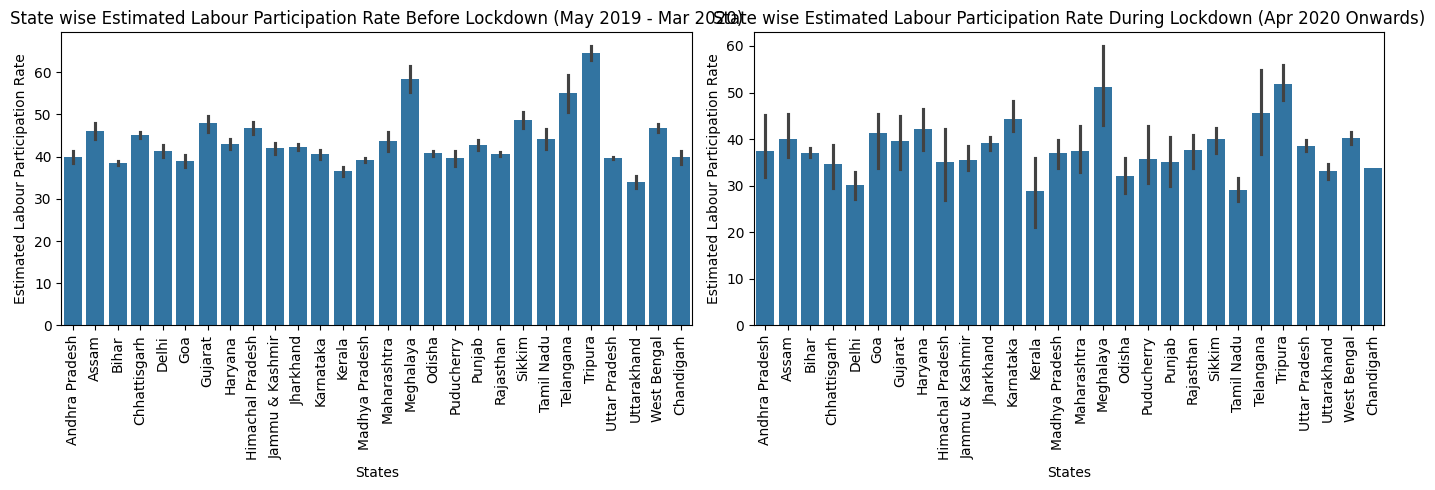

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='States', y='Estimated Labour Participation Rate', data=df)
plt.title('State wise Estimated Labour Participation Rate Before Lockdown (May 2019 - Mar 2020)')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='States', y='Estimated Labour Participation Rate', data=df_ld)
plt.title('State wise Estimated Labour Participation Rate During Lockdown (Apr 2020 Onwards)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Chart - 6 : Correlation Heatmap**

In [ ]:
df_corr = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
df_ld_corr = df_ld[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

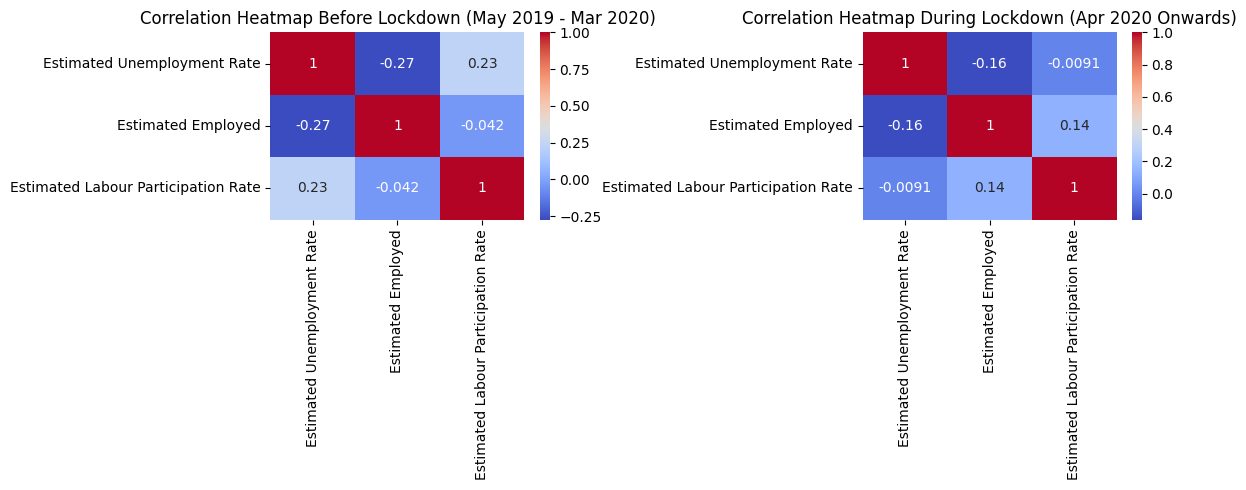

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Before Lockdown (May 2019 - Mar 2020)')
plt.subplot(1, 2, 2)
sns.heatmap(df_ld_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap During Lockdown (Apr 2020 Onwards)')

plt.tight_layout()
plt.show()